           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


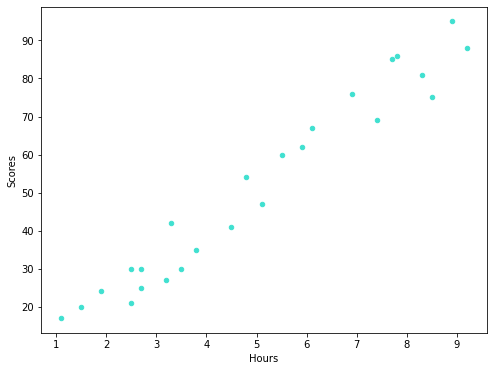

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm, linear_model
from sklearn.model_selection import train_test_split

#Rescale figure's size
plt.rcParams['figure.figsize'] = (8,6) #width and height of figure

# Preprocessing Input data
path_to_file = 'F:\AI\Supervised Learning\student_scores.csv'
df = pd.read_csv(path_to_file)

#visualize
df.plot.scatter(x="Hours", y="Scores", color = 'turquoise')

#Test the correlation (Check if linear regression is applicable)
print(df.corr())

In [9]:
#Reshape to 2D arrays
#Initially X and Y have no row and no column, just elements
X = df['Hours'].values.reshape(-1,1)#-1:unknown row, whatever it takes to reshape compatibly; 1: 1 column
Y = df['Scores'].values.reshape(-1,1)
#Separate targets and features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
# The method randomly takes samples respecting the percentage we've defined,
# but respects the X-y pairs, lest the sampling would totally mix up the relationship. 
# Some common train-test splits are 80/20 and 70/30.
print(X_train) 
print(Y_train) 

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
[[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]


In [10]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
#Intercept(b)
print(f'b = { regressor.intercept_}')
#Slope
print(f'w = {regressor.coef_}')

#predict
# Passing 3.6 in double brackets to have a 2 dimensional array
score = regressor.predict([[3.6]])
print(score) # 94.80663482


b = [2.82689235]
w = [[9.68207815]]
[[37.68237371]]


In [11]:
#Make predictions based on test data
Y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': Y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153
